In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:


orders_df = pd.read_csv('SuperStoreUS-2015_Orders.csv', encoding='latin1', on_bad_lines='skip',sep=';')
returns_df = pd.read_csv('SuperStoreUS-2015(Returns).csv', encoding='latin1')

In [8]:
orders_df


,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,"0,01","2,84","0,93",3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,07.01.2015,08.01.2015,"4,56",4,"13,01",88522
1,20228,Not Specified,"0,02","500,98",26,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,13.06.2015,15.06.2015,"4390,3665",12,"6362,85",90193
2,21776,Critical,"0,06","9,48","7,29",11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,15.02.2015,17.02.2015,"-53,8096",22,"211,15",90192
3,24844,Medium,"0,09","78,69","19,99",14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,12.05.2015,14.05.2015,"803,4705",16,"1164,45",86838
4,24846,Medium,"0,08","3,28","2,31",14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,12.05.2015,13.05.2015,"-24,03",7,"22,23",86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,High,"0,01","10,9","7,46",3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Danville,61832,11.03.2015,12.03.2015,"-116,76",18,"207,31",87536
1948,19843,High,"0,1","7,99","5,03",3397,Andrea Shaw,Regular Air,Small Business,Technology,...,Central,Illinois,Danville,61832,11.03.2015,12.03.2015,"-160,952",22,"143,12",87536
1949,26208,Not Specified,"0,08","11,97","5,81",3399,Marvin Reid,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Des Plaines,60016,29.03.2015,31.03.2015,"-41,87",5,"59,98",87534
1950,24911,Medium,"0,1","9,38","4,93",3400,Florence Gold,Express Air,Small Business,Furniture,...,East,West Virginia,Fairmont,26554,04.04.2015,04.04.2015,"-24,7104",15,"135,78",87537


In [14]:
orders_df.dtypes

Row ID                           int64
Order Priority                  object
Discount                       float64
Unit Price                     float64
Shipping Cost                  float64
Customer ID                      int64
Customer Name                   object
Ship Mode                       object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Container               object
Product Name                    object
Product Base Margin            float64
Country                         object
Region                          object
State or Province               object
City                            object
Postal Code                      int64
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Profit                         float64
Quantity ordered new             int64
Sales                          float64
Order ID                         int64
dtype: object

In [13]:
# Convert columns with numeric values stored as strings (with commas) to appropriate numeric types
cols_to_float = ['Discount', 'Unit Price', 'Shipping Cost', 'Product Base Margin', 'Profit', 'Sales']
for col in cols_to_float:
    orders_df[col] = orders_df[col].str.replace(',', '.', regex=False)
    orders_df[col] = pd.to_numeric(orders_df[col], errors='coerce')

# Convert date columns to datetime
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'], format='%d.%m.%Y', errors='coerce')
orders_df['Ship Date'] = pd.to_datetime(orders_df['Ship Date'], format='%d.%m.%Y', errors='coerce')

C:\Users\Bartłomiej\AppData\Local\Temp\ipykernel_644\2210690536.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=orders_df, x='Region', y='Profit', estimator=np.sum, ci=None)


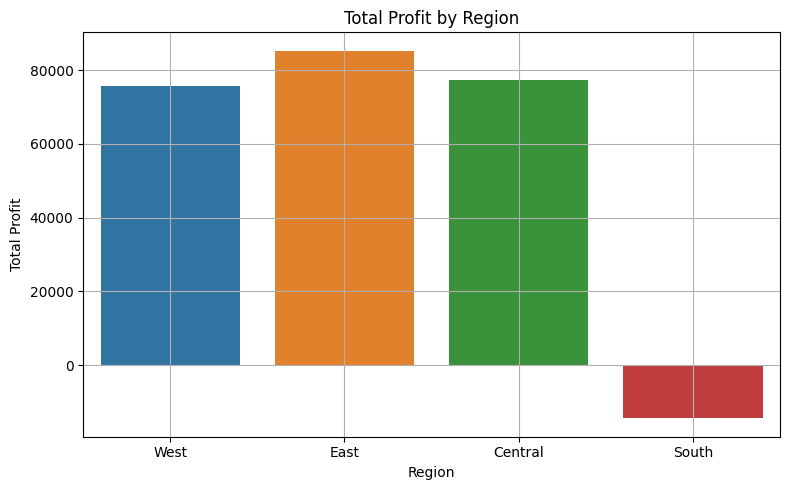

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=orders_df, x='Region', y='Profit', estimator=np.sum, ci=None)
plt.title('Total Profit by Region')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Bartłomiej\AppData\Local\Temp\ipykernel_644\3266029180.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=orders_df, x='Product Category', y='Sales', estimator=np.sum, ci=None, ax=ax[0])
C:\Users\Bartłomiej\AppData\Local\Temp\ipykernel_644\3266029180.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=orders_df, x='Product Category', y='Profit', estimator=np.sum, ci=None, ax=ax[1])


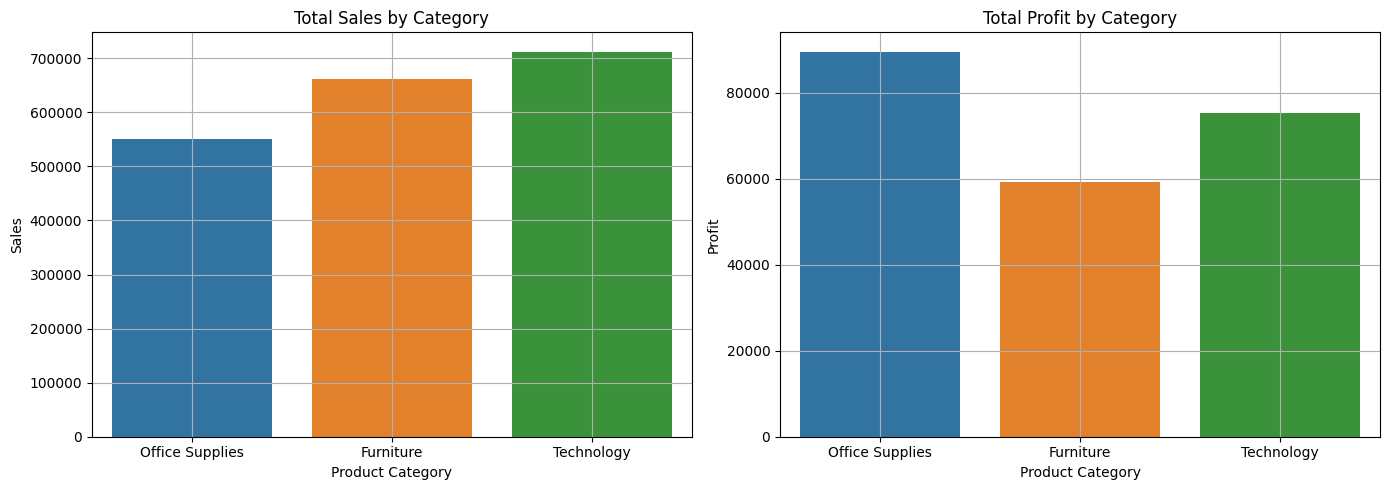

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=orders_df, x='Product Category', y='Sales', estimator=np.sum, ci=None, ax=ax[0])
ax[0].set_title('Total Sales by Category')
ax[0].grid(True)

sns.barplot(data=orders_df, x='Product Category', y='Profit', estimator=np.sum, ci=None, ax=ax[1])
ax[1].set_title('Total Profit by Category')
ax[1].grid(True)

plt.tight_layout()
plt.show()